# Data Visualization $\,\, \tiny\text{Analysis | NASDAQ & NYSE (Stock Market)}$

<img src="banner lab 1.jpg" align=left>

### About the Business Situation & Data
___

The dataset that used for this analysis is called ** $\,$ `dataset tech stocks.xlsx` $\,$ **. 

### Apparatus
___

In [2]:
options(warn=-1)

# Load some required functions
library(rJava,      verbose=FALSE, warn.conflicts=FALSE, quietly=TRUE)
library(xlsxjars,   verbose=FALSE, warn.conflicts=FALSE, quietly=TRUE)
library(xlsx,       verbose=FALSE, warn.conflicts=FALSE, quietly=TRUE) # Also, ensure Java version (32-bit or 64-bit) matches R kernel
library(ggplot2,    verbose=FALSE, warn.conflicts=FALSE, quietly=TRUE)
library(gridExtra,  verbose=FALSE, warn.conflicts=FALSE, quietly=TRUE) 
library(GGally,     verbose=FALSE, warn.conflicts=FALSE, quietly=TRUE)
library(reshape2,   verbose=FALSE, warn.conflicts=FALSE, quietly=TRUE)
library(IRdisplay,  verbose=FALSE, warn.conflicts=FALSE, quietly=TRUE)
library(base64enc,  verbose=FALSE, warn.conflicts=FALSE, quietly=TRUE)

# Define some useful functions
video = function(filename, mimetype) { d = base64encode(filename, 'raw'); display_html(paste0('<video controls src="data:', mimetype, ';base64,', d, '">')) }  # Not supported in Chrome browser
youtube = function(id, width=500, height=500) { display_html(paste0('<iframe src =https://www.youtube.com/embed/', id, ' width=', width, ', height=', height, ' allowfullscreen></iframe> ' )) }

# Set some visualization constants
restore = list(repr.plot.width=6, repr.plot.height=3)
PALETTE = c("#00A9FF", "#F8766D", "#7CAE00", "#C77CFF", "#CD9600", "#00BE67", "#FF61CC", "#00BFC4")
theme.no_legend = theme(legend.position="none")

# Set some visualization formatting defaults
options(restore)
update_geom_defaults("point", list(size=0.25, colour=PALETTE[3]))
update_geom_defaults("line", list(size=0.15))
update_geom_defaults("bar", list(colour=NA, fill=PALETTE[3]))
theme_update(plot.title=element_text(size=10, hjust=0.5), plot.subtitle=element_text(size=8, face="italic", hjust=0.5), axis.title=element_text(size=7), axis.text=element_text(size=7), strip.text=element_text(size=7), strip.text.y=element_text(angle=90), legend.title=element_blank(), legend.text=element_text(size=7))

We use the `library` function (provided by the R system) multiple times to load specific libraries of functions.  The functions result in providing us all of the many functions contained in the libraries, which we can use later.

We define 2 additional useful functions not included in the libraries: `video` and `youtube`.  We can use them later.

We use the `update_geom_defaults` and `theme_update` functions to set some visualization formatting defaults that will stay in effect.

### Data Retrieval
___

In [19]:
data = read.xlsx("../DATASETS/DATASET High-Tech Stocks.xlsx", sheetIndex=1, header=TRUE)
dim(data)
colnames(data)

[1] 261  12

[1] "Date"                         "Apple.Return"                
 [3] "Dell.Return"                  "IBM.Return"                  
 [5] "Microsoft.Return"             "Value.weighted.Market.Return"
 [7] "SP.500.Return"                "Price..Dell"                 
 [9] "Price..Apple"                 "Price..IBM"                  
[11] "Price..Microsoft"             "Calendar.Date"

To retrieve the dataset in file `dataset tech stocks.xlsx`, we use the `read.xlsx` function.  To confirm that the dataset has been retrieved and assigned, we use the `dim` and `colname` functions.

### Data Formatting
___

#### Calculate the mean of the standard deviations for the 4 tech returns, and compare it to the standard deviation for the S&P 500 returns.

In [ ]:
cat(sprintf("Mean standard deviation for 4 tech returns = $%0.2f\n", mean(c(sd(data[,2]), sd(data[,3]), sd(data[,4]), sd(data[,5])))))
cat(sprintf("Standard deviation for S&P 500 return = $%0.2f\n", sd(data[, 7])))

To compute the mean of the 4 tech returns' standard deviations, we first use <code>[&#8230;]</code> notation to reference columns 2, 3, 4, and 5.  Then we use the `sd` function, once per column, to compute the standard deviation for each column.  Then we use the `c` function to combine these 4 standard deviation values into a single vector.  Then we use the `mean` function to compute the mean of the vector's values.  Taken all together, it looks like this:<br>
`mean(c(sd(data[,2]), sd(data[,3]), sd(data[,4]), sd(data[,5])))`

To format the upcoming presentation of the resulting value, we use the `sprintf` function.  The 1st parameter is a string that specifies the format.  The 2nd parameter is the value to be substituted in according to the format specification, in this case the computation of the mean of the 4 tech returns' standard deviations.  Taken all together, it looks like this:<br>
`sprintf("Mean standard deviation for 4 tech returns = $%0.2f\n", mean(c(sd(data[,2]), sd(data[,3]), sd(data[,4]), sd(data[,5]))))`

To send the presentation of the resulting value to output, we use the `cat` function.  Taken all together, it looks like this:<br>
`cat(sprintf("Mean standard deviation for 4 tech returns = $%0.2f\n", mean(c(sd(data[,2]), sd(data[,3]), sd(data[,4]), sd(data[,5])))))`

To compute, format, and send to output the S&P 500 returns' standard deviation, we use the same approach.  Taken all together, it looks like this:<br>
`cat(sprintf("Standard deviation for S&P 500 return = $%0.2f\n", sd(data[, 7])))`

Note, the 2nd resulting value is output on its own line.  This is because the 1st resulting value has been formatted to force subsequent output onto a new line - that's indicated by `\n` in the format specification.

_ About format specification:<br>
A format specification is described by a string.  Some patterns in the string are meant to be substituted with values.  One such useful pattern is `%0.2f`. In this pattern, `%` means start the substitution, `0` means no leading zeros, `.2` means 2 decimal places, and `f` means numeric.  `\n` means subsequent output should move to the next line. _

### Data Visualization
___

#### Show a scatterplot of Apple returns vs time.

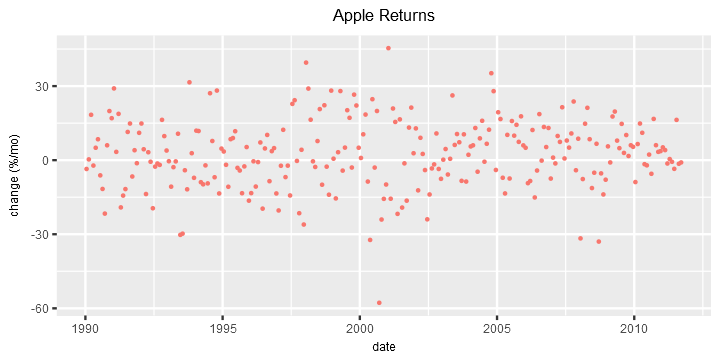

In [20]:
ggplot(data) +
geom_point(aes(x=Date, y=Apple.Return*100), color=PALETTE[2]) +
ggtitle("Apple Returns") + xlab("date") + ylab("change (%/mo)")

To size the upcoming visualization, we use the `options` function.  The `repr.plot.width` parameter sets the width.  The `repr.plot.height` parameter sets the height.

To visualize Apple returns as a scatterplot, we use `ggplot` and related functions.  These functions initialize the visualization and create additional visualization layers.  We use the `+` operator to connect the initialized visualization to other layers.  Note, the `+` operator used in this context does not mean numerical additional.

`ggplot` initializes the visualization.  The parameter is a table that includes the columns of values to be visualized, in this case `data`.

`geom_point` creates a layer of points.  The 1st parameter indicates the points' locations.  We use the `aes` function to specify the points' locations, in this case `data`'s `Date` column of values taken as the points' x coordinates, and `data`'s `Apple.Return` column of values, each multiplied by 100, taken as the points' y coordinates.  The `color` parameter is the points' color.  Note, the column names are described not as strings, and so not enclosed within `"` `"`.  Note also, the R system can recognize many different strings as color names.

`ggtitle` creates a layer with a title.  The parameter is the title text.

`xlab` creates a layer with an x-axis label.  The parameter is the x-axis label text.

`ylab` creates a layer with a y-axis label.  The parameter is the y-axis label text.

#### Show a lineplot of Apple returns vs time.

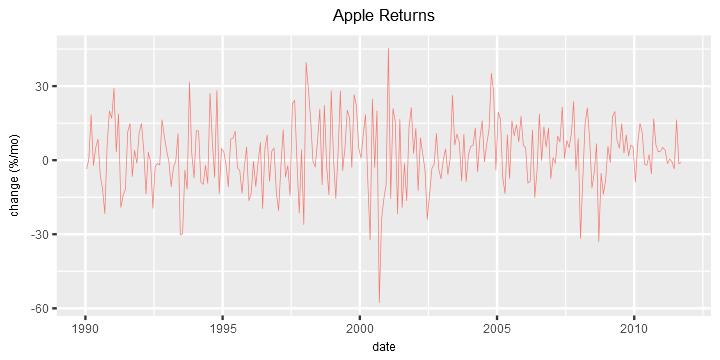

In [21]:
ggplot(data) +
geom_line(aes(x=Date, y=Apple.Return*100), color=PALETTE[2]) +
ggtitle("Apple Returns") + xlab("date") + ylab("change (%/mo)")

To visualize Apple returns as a lineplot, we use the `geom_line` function instead of the `geom_point` function.

#### Show a histogram of Apple returns.

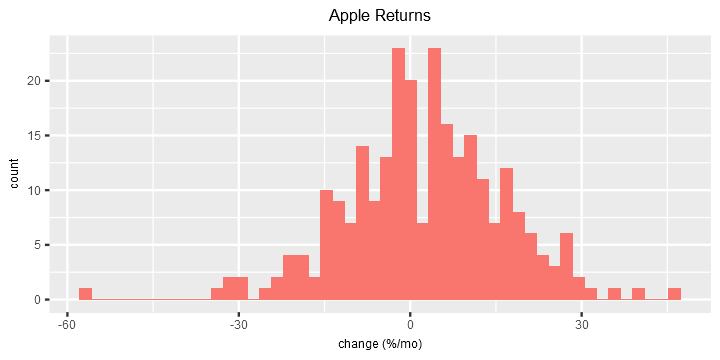

In [22]:
ggplot(data) +
geom_histogram(aes(x=Apple.Return*100), bins=50, fill=PALETTE[2]) +
ggtitle("Apple Returns") + xlab("change (%/mo)")

To visualize Apple returns as a histogram, we use the `geom_histogram` function instead of the `geom_points` or `geom_ line` function.  The 1st parameter is the histogram values.  We use the `aes` function to specify the histogram values, in this case `data`'s `Apple.Returns` column of values, each multiplied by 100.  The `bins` parameter is the histogram's number of bins.  The `color` parameter is the bars' edge color.  The `fill` parameter is the bars' interior color.  Note, no y-axis label need be specified - it defauts to "count".

#### Show the correlation between Apple returns and Dell returns as a scatterplot.

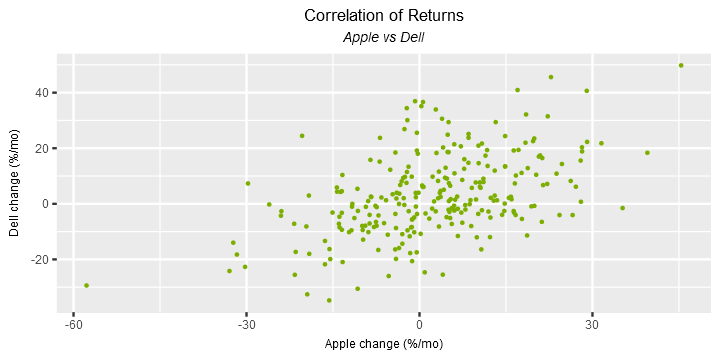

In [23]:
ggplot(data) +
geom_point(aes(x=Apple.Return*100, y=Dell.Return*100)) +
ggtitle("Correlation of Returns", "Apple vs Dell") + xlab("Apple change (%/mo)") + ylab("Dell change (%/mo)")

To visualize the correlation between Apple returns and Dell returns as a scatterplot, we use the `geom_point` function, but reference the `Apple.Returns` and `Dell.Returns` columns instead of the `Date` and `Apple.Returns` columns.

Note, the `ggtitle` function can take 2 parameters.  If present, the 2nd parameter is the subtitle text.

#### Compare Apple returns to S&P 500 returns as a lineplot vs time.

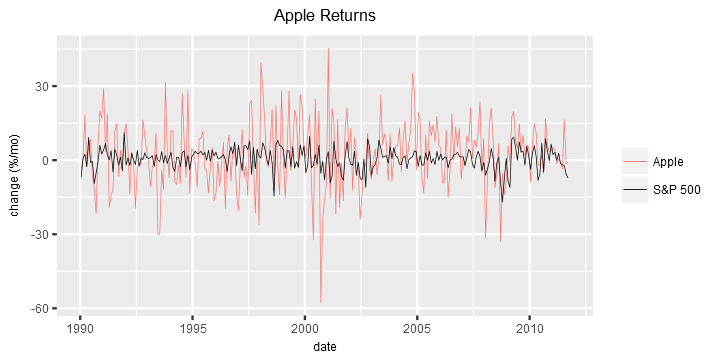

In [24]:
ggplot(data) +
geom_line(aes(x=Date, y=Apple.Return*100, color="Apple")) +
geom_line(aes(x=Date, y=SP.500.Return*100, color="S&P 500")) +
scale_color_manual(values=c("Apple"=PALETTE[2], "S&P 500"="black")) +
ggtitle("Apple Returns") + xlab("date") + ylab("change (%/mo)")

To visualize Apple returns and Dell returns as a lineplot, we use the `geom_line` function twice.

The 1st `geom_line` creates a layer with a line of connected points.  The 1st parameter indicates the points' locations and their legend label.  We use the `aes` function to specify the points' locations and their legend label.  Note, the `color` parameter of the `aes` function is the legend label, not to be confused with the `color` parameter of the `geom_line` function that we used earlier.

The 2nd `geom_line` creates another layer with a line of connected points.

`scale_color_manual` creates a layer with a map of which legend lables go with which colors.  The `values` parameter is a vector of color names, each element named by its associated legend label.

Because (in the `geom_line` functions) `aes` functions have been used with `color` parameters, the visualization will automatically include a legend.

_ About naming vector elements:<br>
The `c` function is used to create a vector of values, e.g., `x = c("brown2", "black")` results in a vector of 2 elements, the 1st element value is "brown2", the 2nd element value is "black".  Vector elements can be named with `=` notation, e.g., `x = c("Apple"="brown2", "S&P 500"="black")` results in a vector of 2 elements, the 1st element is named "Apple", the 2nd element is named "S&P 500".  Then, specific elements can be referenced by name, e.g., `x["Apple"]` has the value "brown2", and `x["S&P 500"]` has the value "black". _

#### Compare the 4 tech returns to S&P 500 returns as a lineplot vs time.

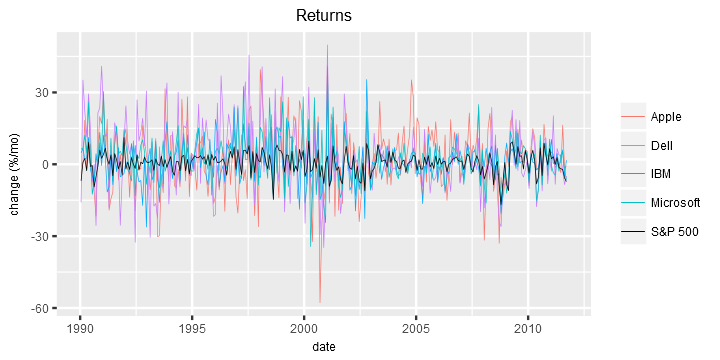

In [26]:
ggplot(data) +
geom_line(aes(x=Date, y=Apple.Return*100, color="Apple")) +
geom_line(aes(x=Date, y=Dell.Return*100, color="Dell")) +
geom_line(aes(x=Date, y=IBM.Return*100, color="IBM")) +
geom_line(aes(x=Date, y=Microsoft.Return*100, color="Microsoft")) +
geom_line(aes(x=Date, y=SP.500.Return*100, color="S&P 500")) +
scale_color_manual(values=c("Apple"=PALETTE[2], "Dell"=PALETTE[4], "IBM"=PALETTE[1], "Microsoft"=PALETTE[8], "S&P 500"="black")) +
ggtitle("Returns") + xlab("date") + ylab("change (%/mo)")

To visualize all returns as a lineplot, we use the `geom_line` function once for each column of returns.<br>

#### Compare the 4 tech returns to S&P 500 returns as a lineplot vs time - alternative "long data" method. _(advanced)_

In [ ]:
data.long = melt(data[, c(1:5,7)], id.vars=c("Date"))

head(data)
head(data[,c(1:5,7)])
head(data.long)
tail(data.long)

In [ ]:
ggplot(data.long) +
geom_line(aes(x=Date, y=value*100, color=variable)) +
scale_color_manual(values=c(PALETTE[c(2,4,1,8)], "black")) +
ggtitle("Returns") + xlab("Date") + ylab("change (%/mo)")

As an alternative way to visualize all returns as a lineplot, we convert (a slice of) `data` to "long" form, and then use the `geom_line` function just once.

`geom_line` creates a layer with a line of points.  The parameter indicates the points' locations and their legend labels.  We use the `aes` function to specify the points' locations and their legend labels.  Note, the `color` parameter of the `aes` function takes `data.long`'s `variable` column of values, which are the original returns column names, which also serve as the legend labels.  The legend lables disambiguate which points go with which lines. 

#### Compare the 4 tech returns to S&P 500 returns as multiple side-by-side lineplots vs time. _(advanced)_

In [ ]:
options(repr.plot.width=5, repr.plot.height=5)

ggplot(data.long) +
facet_wrap("variable", strip.position="right", nrow=5) +
geom_line(aes(x=Date, y=value*100, color=variable)) +
scale_color_manual(values=c(PALETTE[c(2,4,1,8)], "black")) +
ggtitle("Returns") + xlab("Date") + ylab("change (%/mo)") + theme.no_legend

options(restore)

To visualize all returns as side-by-side lineplots, we again convert (a slice of) `data` to "long" form, and then use the `facet_wrap` function to separate out individual lineplots according to legend label.

`facet_wrap` creates a layer with instructions to separate out individual lineplots according to legend label.  The 1st parameter is the name of the column with the legend label values, in this case `"variable"`.  It is described as a string, so it is enclosed within <code>"&#8230;"</code>.   The `strip.position` parameter is the relative location of the legend labels in the visualization layout, in this case to the right of individual lineplots.  The `nrow` parameter is the number of rows in the visualization layout.

`theme` creates a layer of visualization format specifications.  The `legend.position` parameter is the relative location of the legend in the visualization layout, in this case `"none"`, which effectively prevents the legend from expicitly appearing in the visualization.

#### Show the correlations between the 4 tech returns as multiple side-by-side scatterplots.

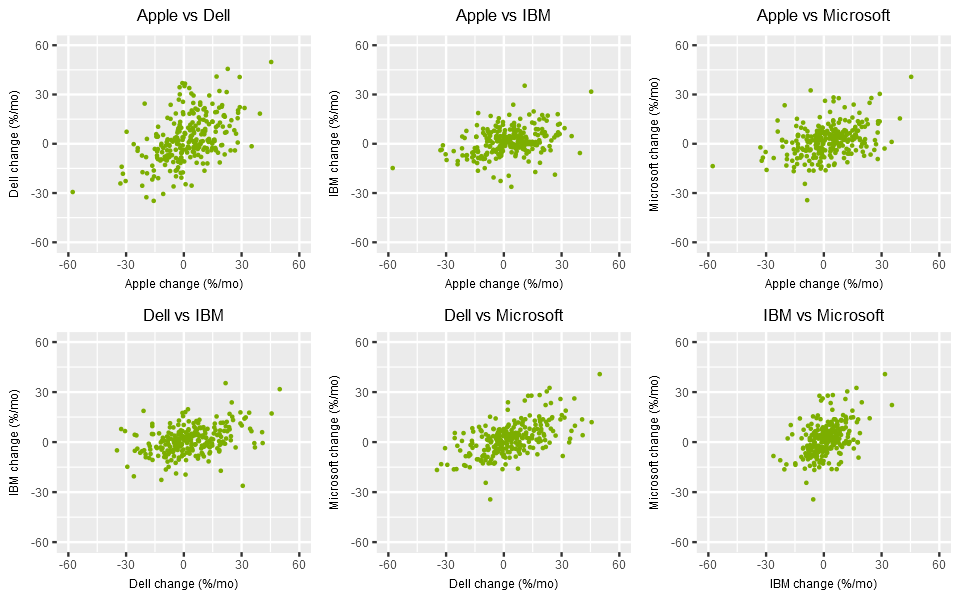

In [27]:
options(repr.plot.width=8, repr.plot.height=5)

c.apple.dell = ggplot(data) +
               geom_point(aes(x=Apple.Return*100, y=Dell.Return*100)) +
               xlim(-60,60) + ylim(-60,60) +
               ggtitle("Apple vs Dell") + xlab("Apple change (%/mo)") + ylab("Dell change (%/mo)")

c.apple.ibm = ggplot(data) +
              geom_point(aes(x=Apple.Return*100, y=IBM.Return*100)) +
              xlim(-60,60) + ylim(-60,60) +
              ggtitle("Apple vs IBM") + xlab("Apple change (%/mo)") + ylab("IBM change (%/mo)")

c.apple.microsoft = ggplot(data) +
                    geom_point(aes(x=Apple.Return*100, y=Microsoft.Return*100)) +
                    xlim(-60,60) + ylim(-60,60) +
                    ggtitle("Apple vs Microsoft") + xlab("Apple change (%/mo)") + ylab("Microsoft change (%/mo)")

c.dell.ibm = ggplot(data) +
             geom_point(aes(x=Dell.Return*100, y=IBM.Return*100)) +
             xlim(-60,60) + ylim(-60,60) +
             ggtitle("Dell vs IBM") + xlab("Dell change (%/mo)") + ylab("IBM change (%/mo)")

c.dell.microsoft = ggplot(data) +
                   geom_point(aes(x=Dell.Return*100, y=Microsoft.Return*100)) +
                   xlim(-60,60) + ylim(-60,60) +
                   ggtitle("Dell vs Microsoft") + xlab("Dell change (%/mo)") + ylab("Microsoft change (%/mo)")

c.ibm.microsoft = ggplot(data) +
                  geom_point(aes(x=IBM.Return*100, y=Microsoft.Return*100)) +
                  xlim(-60,60) + ylim(-60,60) +
                  ggtitle("IBM vs Microsoft") + xlab("IBM change (%/mo)") + ylab("Microsoft change (%/mo)")

grid.arrange(c.apple.dell, c.apple.ibm, c.apple.microsoft,
             c.dell.ibm, c.dell.microsoft, c.ibm.microsoft,
             nrow=2, ncol=3)

options(restore)

#### Use your creative genius to show a variety of perspectives on the 5 returns. _(advanced)_

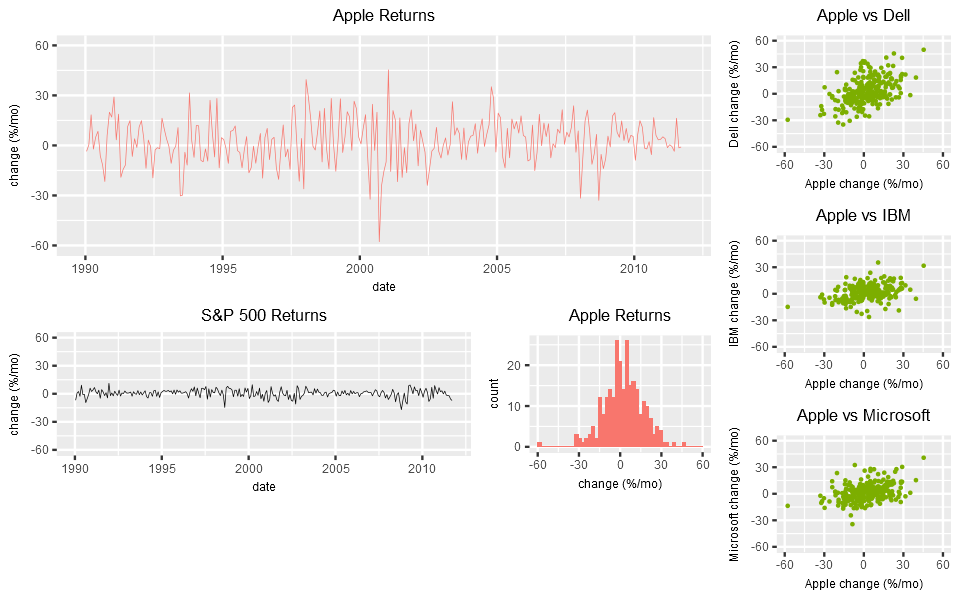

In [28]:
options(repr.plot.width=8, repr.plot.height=5)

h.apple = ggplot(data) +
          geom_histogram(aes(x=Apple.Return*100), bins=50, fill=PALETTE[2], na.rm=TRUE) +
          xlim(-60,60) +
          ggtitle("Apple Returns") + xlab("change (%/mo)")

p.apple = ggplot(data) +
          geom_line(aes(x=Date, y=Apple.Return*100), color=PALETTE[2]) +
          ylim(-60,60) +
          ggtitle("Apple Returns") + xlab("date") + ylab("change (%/mo)")

p.sp500 = ggplot(data) +
          geom_line(aes(x=Date, y=SP.500.Return*100), color="black") +
          ylim(-60,60) +
          ggtitle("S&P 500 Returns") + xlab("date") + ylab("change (%/mo)")
 
grid.arrange(p.apple, c.apple.dell, c.apple.ibm, c.apple.microsoft, p.sp500, h.apple, layout_matrix=rbind(c(1,  1,  1,  2),
                                                                                                          c(1,  1,  1,  2),
                                                                                                          c(1,  1,  1,  3),
                                                                                                          c(5,  5,  6,  3),
                                                                                                          c(5,  5,  6,  4),
                                                                                                          c(NA, NA, NA, 4)))

options(restore)

To present several visualizations in an arbitrary layout, we create the individual visualizations, assign each a name, and use the `grid.arrange` function to specify where the individual visualizations fit according to an arbitrary visualization layout.  The first several parameters are the individual visualizations.  The `layout_matrix` parameter is the  visualization layout.  We use the `rbind` and `c` functions to specify it.  Each vector (constructed by the `c` function) represents a row in the visualization layout.  The vector's values correspond to the order that individual visualizations are provided as parameters.  In this case, `p.apple` is an Apple returns lineplot visualization, provided as parameter 1, to be presented across the first 3 rows and first 3 columns of the overall visualization.  `c.apple.dell` is an Apple vs. Dell correlation scatterplot visualization, provided as parameter 2, to be presented across the first 2 rows and last column of the overall visualization.  The other individual visualizations are handled similarly.  Parts of the visualization layout that present no individual layout are indicated by `NA`.

#### Show the distributions of the 5 returns and the correlations between them.

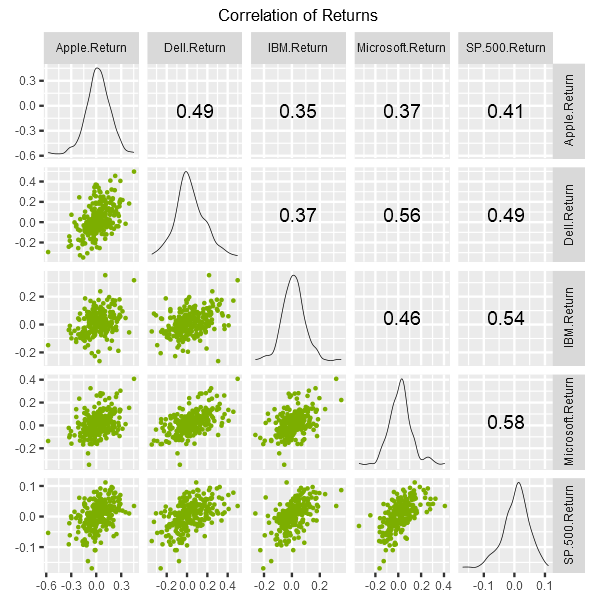

In [29]:
options(repr.plot.width=5, repr.plot.height=5)

ggscatmat(data[,c(2:5,7)]) +
ggtitle("Correlation of Returns")

options(restore)

$\tiny \text{Copyright (c) Berkeley Data Analytics Group, LLC}$